In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
t=pd.read_csv("train (2).csv")
e=pd.read_csv("test.csv")

In [4]:
t

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
e

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
t.info()
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

In [7]:
t.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
e.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
e.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [11]:
t.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
e.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

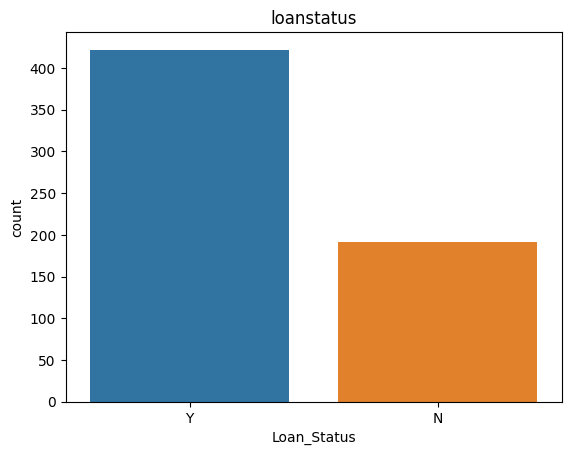

In [13]:
# Visualizing survival based on sex
sns.countplot(x='Loan_Status', hue='Loan_Status', data=t)
plt.title('loanstatus')
plt.show()

In [14]:
# Fill missing values properly (must assign result back to the column)
t['Gender'] = t['Gender'].fillna(t['Gender'].mode()[0])
t['Married'] = t['Married'].fillna(t['Married'].mode()[0])
t['Dependents'] = t['Dependents'].fillna(t['Dependents'].mode()[0])
t['Self_Employed'] = t['Self_Employed'].fillna(t['Self_Employed'].mode()[0])
t['LoanAmount'] = t['LoanAmount'].fillna(t['LoanAmount'].median())
t['Loan_Amount_Term'] = t['Loan_Amount_Term'].fillna(t['Loan_Amount_Term'].mode()[0])
t['Credit_History'] = t['Credit_History'].fillna(t['Credit_History'].mode()[0])

# Label encode all object columns EXCEPT 'Loan_Status'
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in t.select_dtypes(include=['object']).columns:
    if column != 'Loan_Status':
        le = LabelEncoder()
        t[column] = le.fit_transform(t[column])
        label_encoders[column] = le

# Now safely convert Loan_Status manually
if 'Loan_Status' in t.columns:
    t['Loan_Status'] = t['Loan_Status'].map({'Y': 1, 'N': 0})


In [15]:
t

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [16]:
# Fill missing values correctly
e['Gender'] = e['Gender'].fillna(e['Gender'].mode()[0])
e['Married'] = e['Married'].fillna(e['Married'].mode()[0])
e['Dependents'] = e['Dependents'].fillna(e['Dependents'].mode()[0])
e['Self_Employed'] = e['Self_Employed'].fillna(e['Self_Employed'].mode()[0])
e['LoanAmount'] = e['LoanAmount'].fillna(e['LoanAmount'].median())
e['Loan_Amount_Term'] = e['Loan_Amount_Term'].fillna(e['Loan_Amount_Term'].mode()[0])
e['Credit_History'] = e['Credit_History'].fillna(e['Credit_History'].mode()[0])

# Label encoding: convert all to string to avoid mix of int/str errors
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in e.select_dtypes(include=['object']).columns:
    e[column] = e[column].astype(str)  # convert all to string
    le = LabelEncoder()
    e[column] = le.fit_transform(e[column])
    label_encoders[column] = le


In [17]:
e

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [18]:
t.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
e.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [20]:
t['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [21]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Separate features and target
X = t.drop('Loan_Status', axis=1)
y = t['Loan_Status']

In [22]:
# Apply Lasso for feature selection
lasso = Lasso(alpha=0.005)
selector = SelectFromModel(estimator=lasso)
selector.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [23]:
selector.get_support()

array([ True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True])

In [24]:
len(X.columns)

12

In [25]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"✅ Selected {len(selected_features)} important features:")
print(selected_features.tolist())

✅ Selected 9 important features:
['Loan_ID', 'Married', 'Dependents', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [26]:
selected_features

Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [27]:
d=t[selected_features]

In [28]:
d=d.drop('Loan_ID',axis=1)

In [29]:
d

,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0.0,128.0,360.0,1.0,2
1,1,1,0,1508.0,128.0,360.0,1.0,0
2,1,0,0,0.0,66.0,360.0,1.0,2
3,1,0,1,2358.0,120.0,360.0,1.0,2
4,0,0,0,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...
609,0,0,0,0.0,71.0,360.0,1.0,0
610,1,3,0,0.0,40.0,180.0,1.0,0
611,1,1,0,240.0,253.0,360.0,1.0,2
612,1,2,0,0.0,187.0,360.0,1.0,2


In [30]:
X = d
y = t.loc[d.index,'Loan_Status']

In [31]:
d.head()

,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0.0,128.0,360.0,1.0,2
1,1,1,0,1508.0,128.0,360.0,1.0,0
2,1,0,0,0.0,66.0,360.0,1.0,2
3,1,0,1,2358.0,120.0,360.0,1.0,2
4,0,0,0,0.0,141.0,360.0,1.0,2


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


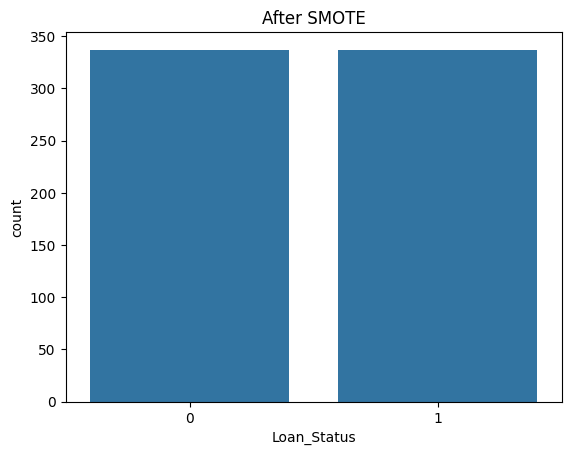

[5.91988131e-01 6.66172107e-01 1.88427300e-01 1.52291162e+03
 1.46649883e+02 3.43475596e+02 7.65876984e-01 9.09495549e-01]
[4.91465343e-01 9.33937077e-01 3.91053005e-01 2.55835471e+03
 7.98677970e+01 6.19481758e+01 3.93969441e-01 7.83243682e-01]


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE only on training
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val)

# (Optional) Visualize class balance
sns.countplot(x=y_train_smote)
plt.title("After SMOTE")
plt.show()

print(scaler.mean_)
print(scaler.scale_)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 🧠 Define ANN
model = Sequential([
    Dense(512, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

# ⚙️ Compile
model.compile(
    optimizer=Adam(learning_rate=0.00005),  
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 🛑 Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# 🔁 Train
history = model.fit(
    X_train_scaled, y_train_smote,
    validation_split=0.1,
    epochs=200,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

# 🔍 Predict
y_pred_probs = model.predict(X_val_scaled)
y_pred = (y_pred_probs > 0.4).astype(int)


# 📈 Evaluate
print("\n📈 ANN Classification Report:")
print(classification_report(y_val, y_pred))
print("\n🔢 Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


C:\Users\Sri vidhya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4655 - loss: 1.1173 - val_accuracy: 0.6324 - val_loss: 0.6750
Epoch 2/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4358 - loss: 0.9608 - val_accuracy: 0.3088 - val_loss: 0.7111
Epoch 3/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4977 - loss: 0.8407 - val_accuracy: 0.2500 - val_loss: 0.7417
Epoch 4/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5293 - loss: 0.7904 - val_accuracy: 0.3235 - val_loss: 0.7540
Epoch 5/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5001 - loss: 0.7793 - val_accuracy: 0.3824 - val_loss: 0.7464
Epoch 6/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5442 - loss: 0.6922 - val_accuracy: 0.4559 - val_loss: 0.7344
Epoch 7/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6131 - loss: 0.6450 - val_accuracy: 0.5147 - val_loss: 0.7041
Epoch 8/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6075 - loss: 0.6810 - val_accuracy: 0.5147 - v

In [35]:
 #9️⃣ Save the Model
model.save("loanstatus_model.h5")
print("✅ Model saved successfully.")

✅ Model saved successfully.


In [37]:
import os
import pickle

# Folder where you want to save
folder_path = r"E:\loanstatus"
os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist

# Full file path
file_path = os.path.join(folder_path, "scaler.pkl")

# Save your scaler
with open(file_path, "wb") as f:
    pickle.dump(scaler, f)

print(f"Scaler saved successfully at: {file_path}")

Scaler saved successfully at: E:\loanstatus\scaler.pkl
